In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train_Quora.csv')  # Update the path to your dataset file


In [3]:
data.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.shape


(404290, 6)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
data.isnull().sum()


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into question pairs and labels
questions = data[['question1', 'question2']]
labels = data['is_duplicate']

In [8]:
questions

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...
404286,Do you believe there is life after death?,Is it true that there is life after death?
404287,What is one coin?,What's this coin?
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...


# Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. stemming

In [9]:
import nltk

In [10]:
from nltk.stem import PorterStemmer

In [11]:
from nltk.corpus import stopwords

In [12]:
import string

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
ps=PorterStemmer()

In [15]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [16]:
questions['question1']=questions['question1'].apply(transform_text)

In [17]:
questions['question2']=questions['question2'].apply(transform_text)

In [18]:
questions

,question1,question2
0,step step guid invest share market india,step step guid invest share market
1,stori kohinoor diamond,would happen indian govern stole kohinoor diam...
2,increas speed internet connect use vpn,internet speed increas hack dn
3,mental lone solv,find remaind math 24 divid
4,one dissolv water quikli sugar salt methan car...,fish would surviv salt water
...,...,...
404285,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version
404286,believ life death,true life death
404287,one coin,coin
404288,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

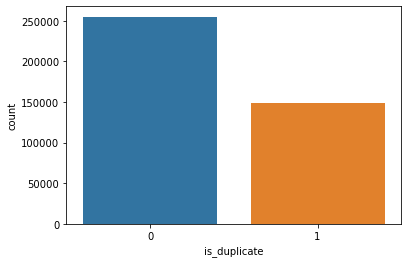

In [19]:
sns.countplot(labels)

In [20]:
questions_train, questions_test, labels_train, labels_test = train_test_split(questions, labels, test_size=0.2, random_state=42)

In [21]:
questions_train.shape

(323429, 2)

In [22]:
questions_test.shape

(80858, 2)

In [23]:
labels_train.shape

(323429,)

In [24]:
labels_test.shape

(80858,)

In [25]:
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(questions_train['question1'] + ' ' + questions_train['question2'])

In [26]:
tfidf_train

<323429x54991 sparse matrix of type '<class 'numpy.float64'>'
	with 2486564 stored elements in Compressed Sparse Row format>

# LogisticRegression

In [35]:
model = LogisticRegression()
model.fit(tfidf_train, labels_train)

LogisticRegression()

In [36]:
tfidf_test = tfidf.transform(questions_test['question1'] + ' ' + questions_test['question2'])
predictions = model.predict(tfidf_test)

In [37]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.742697073882609


In [38]:
cm=confusion_matrix(labels_test, predictions)

<AxesSubplot:>

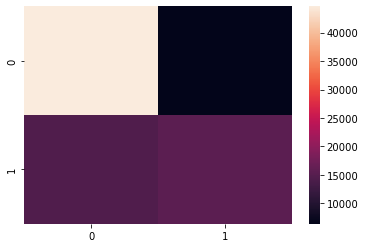

In [39]:
sns.heatmap(data=cm,fmt='d')

In [41]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     51026
           1       0.71      0.52      0.60     29832

    accuracy                           0.74     80858
   macro avg       0.73      0.70      0.70     80858
weighted avg       0.74      0.74      0.73     80858



# RandomForestRegressor

In [42]:
rfr=RandomForestClassifier()


In [43]:
rfr.fit(tfidf_train, labels_train)

RandomForestClassifier()

In [44]:
predictions = rfr.predict(tfidf_test)

In [45]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.81453906849044


In [46]:
cm=confusion_matrix(labels_test, predictions)

<AxesSubplot:>

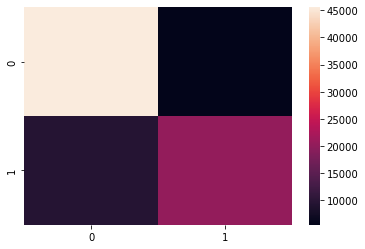

In [47]:
sns.heatmap(data=cm,fmt='d')

In [48]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     51026
           1       0.79      0.68      0.73     29832

    accuracy                           0.81     80858
   macro avg       0.81      0.79      0.79     80858
weighted avg       0.81      0.81      0.81     80858



# KNeighborsClassifier

In [49]:
knc=KNeighborsClassifier()


In [50]:
knc.fit(tfidf_train, labels_train)

KNeighborsClassifier()

In [51]:
predictions = knc.predict(tfidf_test)

In [52]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7667021197655148


In [53]:
cm=confusion_matrix(labels_test, predictions)

<AxesSubplot:>

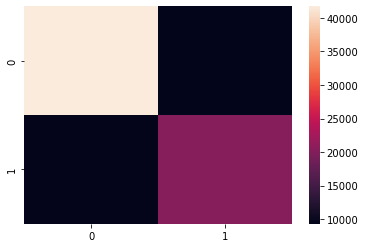

In [54]:
sns.heatmap(data=cm,fmt='d')

In [55]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     51026
           1       0.69      0.68      0.68     29832

    accuracy                           0.77     80858
   macro avg       0.75      0.75      0.75     80858
weighted avg       0.77      0.77      0.77     80858



# XGBClassifier

In [56]:
xgb_i=xgb.XGBClassifier()

In [57]:
xgb_i.fit(tfidf_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
predictions = xgb_i.predict(tfidf_test)

In [59]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7395804991466521


In [60]:
cm=confusion_matrix(labels_test, predictions)

<AxesSubplot:>

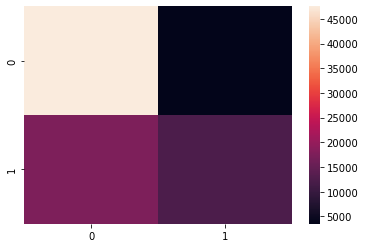

In [61]:
sns.heatmap(data=cm,fmt='d')

In [62]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82     51026
           1       0.78      0.41      0.54     29832

    accuracy                           0.74     80858
   macro avg       0.75      0.67      0.68     80858
weighted avg       0.75      0.74      0.72     80858



# ExtraTreesClassifier

In [63]:
from sklearn.ensemble import ExtraTreesClassifier


In [64]:
etc=ExtraTreesClassifier()


In [65]:
etc.fit(tfidf_train, labels_train)

ExtraTreesClassifier()

In [66]:
predictions = etc.predict(tfidf_test)

In [67]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8235796086967276


In [68]:
cm=confusion_matrix(labels_test, predictions)

<AxesSubplot:>

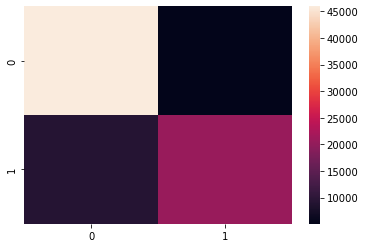

In [69]:
sns.heatmap(data=cm,fmt='d')

In [70]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87     51026
           1       0.80      0.69      0.74     29832

    accuracy                           0.82     80858
   macro avg       0.82      0.80      0.80     80858
weighted avg       0.82      0.82      0.82     80858



# AdaBoostClassifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier


In [72]:
abc=AdaBoostClassifier()

In [73]:
abc.fit(tfidf_train, labels_train)

AdaBoostClassifier()

In [74]:
predictions = abc.predict(tfidf_test)

In [75]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6966657597269287


In [76]:
cm=confusion_matrix(labels_test, predictions)

<AxesSubplot:>

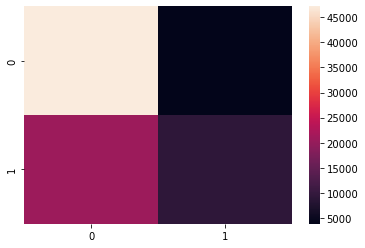

In [77]:
sns.heatmap(data=cm,fmt='d')

In [78]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79     51026
           1       0.70      0.31      0.43     29832

    accuracy                           0.70     80858
   macro avg       0.70      0.62      0.61     80858
weighted avg       0.70      0.70      0.66     80858

